#### Environment setup

In [1]:
!pip install "numpy<1.24"
!pip install scikit-learn scikit-multiflow
!pip install seaborn

  Using cached numpy-1.23.5-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached scikit_learn-1.2.2-cp38-cp38-win_amd64.whl (8.3 MB)
  Using cached scikit_multiflow-0.5.3-cp38-cp38-win_amd64.whl (539 kB)
                                              0.0/42.2 MB ? eta -:--:--
                                              0.1/42.2 MB 3.3 MB/s eta 0:00:13
                                              0.3/42.2 MB 2.6 MB/s eta 0:00:17
                                              0.4/42.2 MB 2.9 MB/s eta 0:00:15
                                              0.6/42.2 MB 3.0 MB/s eta 0:00:15
                                              0.7/42.2 MB 3.2 MB/s eta 0:00:14
                                              0.8/42.2 MB 3.1 MB/s eta 0:00:14
                                              1.0/42.2 MB 3.1 MB/s eta 0:00:14
     -                                        1.1/42.2 MB 3.0 MB/s eta 0:00:14
     -                                        1.3/42.2 MB 3.0 MB/s eta 0:00:14
     -           

#### SEA Generator Stream Analysis

In [1]:
from skmultiflow.data.sea_generator import SEAGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import metrics

sea_stream = SEAGenerator(classification_function = 3, balance_classes=True)
sea_stream.get_data_info()

'SEA Generator - 1 target(s), 2 classes, 3 features'

In [3]:
df = pd.DataFrame()
N_SAMPLES = 10000

def generate_data(stream, n_features, n_samples):
    features = [[] for _ in range(n_features)]
    targets = []
    curr_samples = 0

    while curr_samples < n_samples:
        X, y = stream.next_sample()
        for i in range(n_features):
            features[i].append(X[0][0])
        targets.append(y[0])

        curr_samples += 1
    
    return features, targets

features, targets = generate_data(sea_stream, 3, N_SAMPLES)
sea_stream.restart()

df = pd.DataFrame({'Feature 1': features[0], 'Feature 2': features[1], 'Feature 3': features[2], 'Target': targets})
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,4.245333,4.245333,4.245333,1
1,1.718420,1.718420,1.718420,0
2,7.164328,7.164328,7.164328,1
3,6.486731,6.486731,6.486731,0
4,1.406395,1.406395,1.406395,1


In [4]:
df.dtypes

Feature 1    float64
Feature 2    float64
Feature 3    float64
Target         int64
dtype: object

In [5]:
df.describe(include='all')

,Feature 1,Feature 2,Feature 3,Target
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.838903,4.838903,4.838903,0.500000
std,2.874186,2.874186,2.874186,0.500025
min,0.000418,0.000418,0.000418,0.000000
25%,2.347390,2.347390,2.347390,0.000000
50%,4.760395,4.760395,4.760395,0.500000
75%,7.277809,7.277809,7.277809,1.000000
max,9.994788,9.994788,9.994788,1.000000


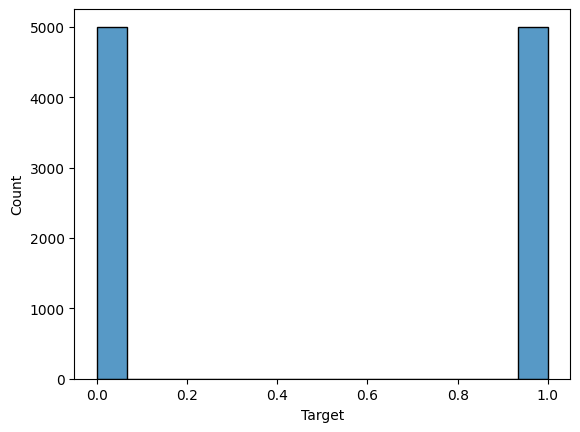

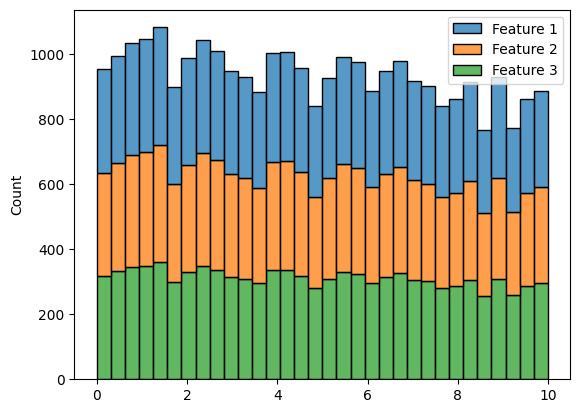

In [6]:
g=sns.histplot(df['Target'])
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_sea_1.png', dpi=300, bbox_inches='tight')

g=sns.histplot(df.drop('Target', axis=1), multiple='stack')
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_sea_1.png', dpi=300, bbox_inches='tight')


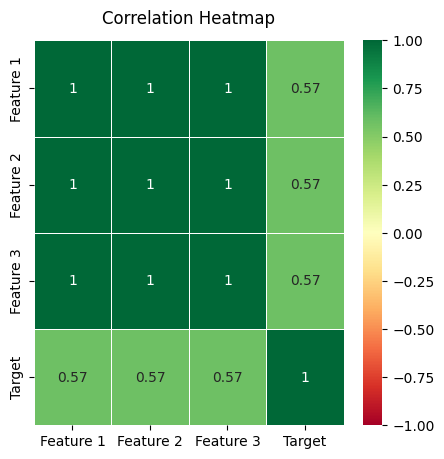

In [7]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map

g=sns.heatmap(df[top_corr_features].corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
g.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('correlation_heatmap_sea_1.png', dpi=300, bbox_inches='tight')

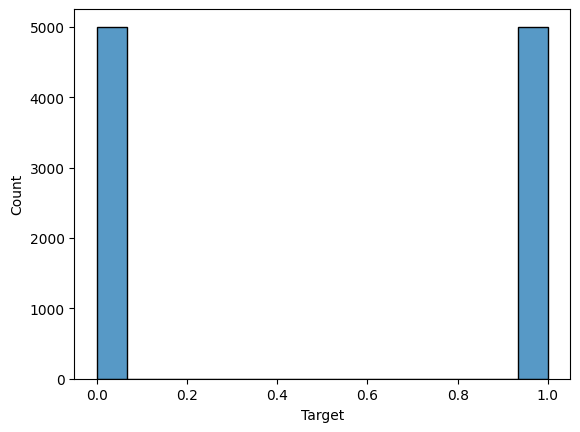

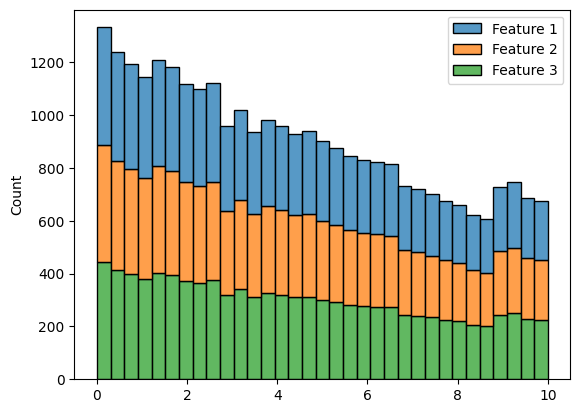

In [8]:
sea_stream.generate_drift()
features, targets = generate_data(sea_stream, 3, N_SAMPLES)
df2 = pd.DataFrame({'Feature 1': features[0], 'Feature 2': features[1], 'Feature 3': features[2], 'Target': targets})

sea_stream.restart()

g=sns.histplot(df2['Target'])
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_sea_2.png', dpi=300, bbox_inches='tight')

g=sns.histplot(df2.drop('Target', axis=1), multiple='stack')
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_sea_2.png', dpi=300, bbox_inches='tight')

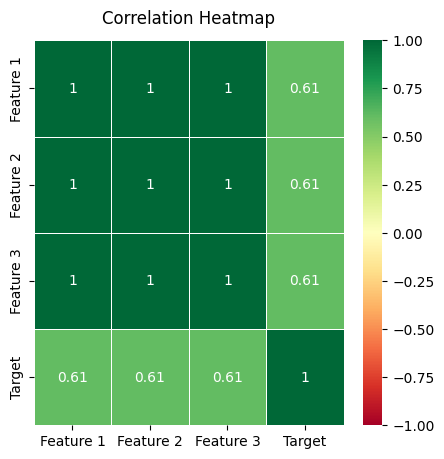

In [9]:
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map

g=sns.heatmap(df2[top_corr_features].corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
g.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('correlation_heatmap_sea_2.png', dpi=300, bbox_inches='tight')

#### Hyperplane generator stream analysis

In [10]:
from skmultiflow.data import HyperplaneGenerator

hyperplane_stream = HyperplaneGenerator(random_state=1, n_features=10, n_drift_features=1, mag_change=0.66, sigma_percentage=0.25)

hyperplane_stream.get_data_info()

'Hyperplane Generator - 1 target(s), 2 classes, 10 features'

In [11]:
features, targets = generate_data(hyperplane_stream, 10, N_SAMPLES)

df_hyplerplane = pd.DataFrame({'Feature 1': features[0], 'Feature 2': features[1], 'Feature 3': features[2], 'Feature 4': features[3], 'Feature 5': features[4], 'Feature 6': features[5], 'Feature 7': features[6], 'Feature 8': features[7], 'Feature 9': features[8], 'Feature 10': features[9], 'Target': targets})

df_hyplerplane.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Target
0,0.419195,0.419195,0.419195,0.419195,0.419195,0.419195,0.419195,0.419195,0.419195,0.419195,0
1,0.313424,0.313424,0.313424,0.313424,0.313424,0.313424,0.313424,0.313424,0.313424,0.313424,0
2,0.691877,0.691877,0.691877,0.691877,0.691877,0.691877,0.691877,0.691877,0.691877,0.691877,1
3,0.908596,0.908596,0.908596,0.908596,0.908596,0.908596,0.908596,0.908596,0.908596,0.908596,1
4,0.589306,0.589306,0.589306,0.589306,0.589306,0.589306,0.589306,0.589306,0.589306,0.589306,1


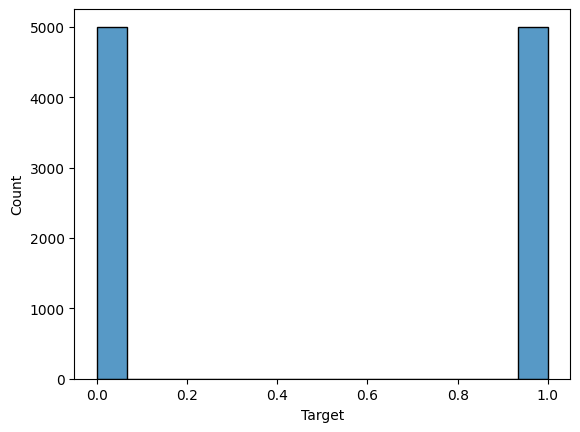

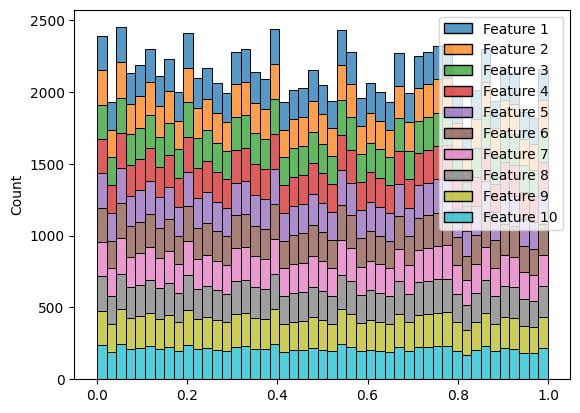

In [12]:

g=sns.histplot(df_hyplerplane['Target'])
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_hyperplane_1.png', dpi=300, bbox_inches='tight')


g=sns.histplot(df_hyplerplane.drop('Target', axis=1), multiple='stack')
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_hyperplane_1.png', dpi=300, bbox_inches='tight')

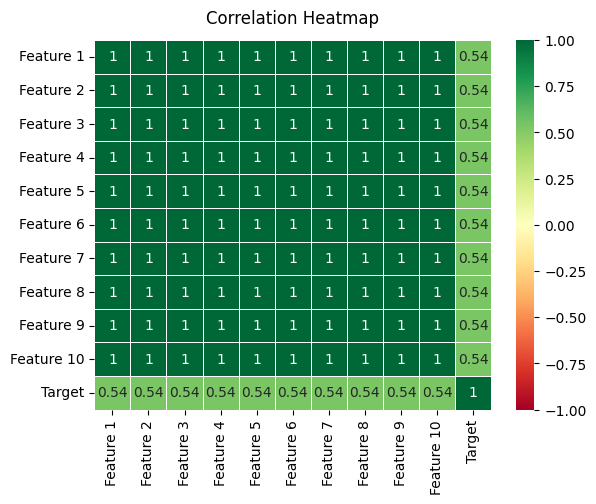

In [13]:
corrmat = df_hyplerplane.corr()
top_corr_features = corrmat.index

#plot heat map

g=sns.heatmap(df_hyplerplane[top_corr_features].corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
g.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('correlation_heatmap_hyperplane_1.png', dpi=300, bbox_inches='tight')


#### Covertype dataset analysis

In [4]:
from streams import build_data_stream

covertype_bunch = build_data_stream('covtype', as_data_frame=True)
covertype_df = covertype_bunch['frame']
covertype_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


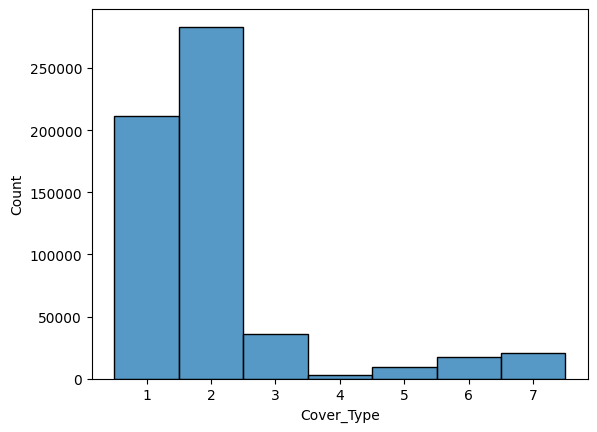

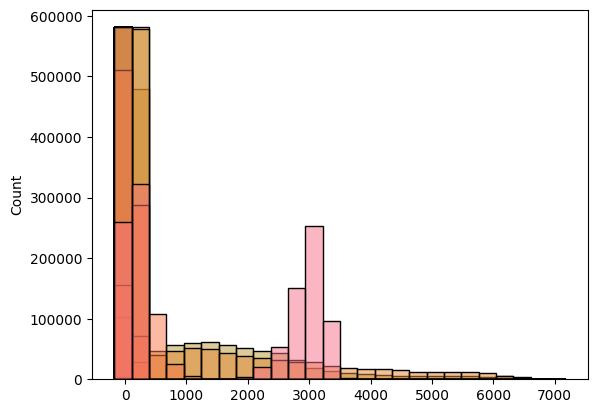

In [16]:
g=sns.histplot(covertype_df['Cover_Type'], discrete=True)
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_covertype_1.png', dpi=300, bbox_inches='tight')

g=sns.histplot(covertype_df.drop('Cover_Type', axis=1), legend=False)
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_covertype_1.png', dpi=300, bbox_inches='tight')

In [5]:
from skmultiflow.data import DataStream

covtype_stream = DataStream(data=covertype_df.drop('Cover_Type', axis=1).to_numpy(), y=covertype_df['Cover_Type'].to_numpy())

covtype_stream.get_data_info()

'1 target(s), 7 classes'

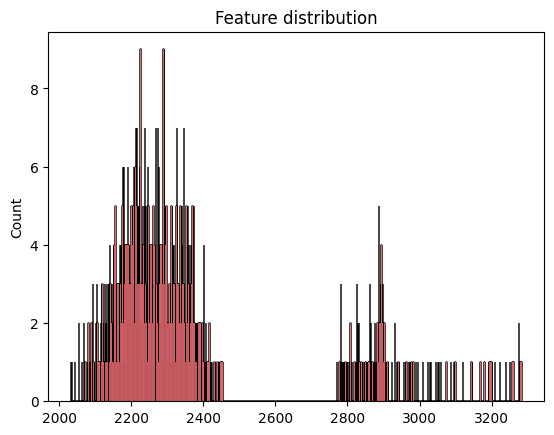

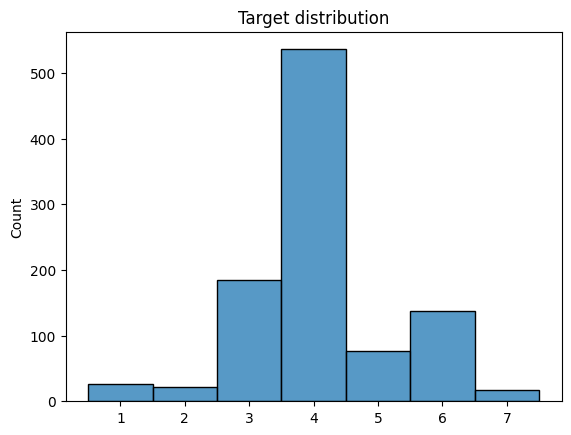

<Figure size 640x480 with 0 Axes>

In [23]:
features, targets = generate_data(covtype_stream, 54, 1000)

g=sns.histplot(features, discrete=True, legend=False)
g.set_title('Feature distribution')
plt.show()
plt.savefig('feature_distribution_covertype_stream_1.png', dpi=300, bbox_inches='tight')

g=sns.histplot(targets, discrete=True)
g.set_title('Target distribution')
plt.show()
plt.savefig('target_distribution_covertype_stream_1.png', dpi=300, bbox_inches='tight')

#### SEA Generator Drift Analysis

e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide

Warning zone has been detected in data: 696 - of index: 696
Warning zone has ended in data: 703 - of index: 703
Warning zone has been detected in data: 705 - of index: 705
Warning zone has ended in data: 721 - of index: 721
Change has been detected in data: 721 - of index: 721
Warning zone has been detected in data: 854 - of index: 854
Warning zone has ended in data: 857 - of index: 857
Change has been detected in data: 857 - of index: 857
Warning zone has been detected in data: 998 - of index: 998
Warning zone has ended in data: 1002 - of index: 1002
Change has been detected in data: 1002 - of index: 1002


e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream

Warning zone has been detected in data: 1793 - of index: 1793
Warning zone has ended in data: 1797 - of index: 1797
Change has been detected in data: 1797 - of index: 1797
Warning zone has been detected in data: 2124 - of index: 2124
Warning zone has ended in data: 2126 - of index: 2126
Warning zone has been detected in data: 2128 - of index: 2128
Warning zone has ended in data: 2129 - of index: 2129
Warning zone has been detected in data: 2138 - of index: 2138


e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:516: 

Warning zone has ended in data: 2166 - of index: 2166
Change has been detected in data: 2166 - of index: 2166
Warning zone has been detected in data: 2254 - of index: 2254
Warning zone has ended in data: 2256 - of index: 2256
Warning zone has been detected in data: 2257 - of index: 2257
Warning zone has ended in data: 2261 - of index: 2261
Change has been detected in data: 2261 - of index: 2261
Warning zone has been detected in data: 4771 - of index: 4771
Warning zone has ended in data: 4804 - of index: 4804
Change has been detected in data: 4804 - of index: 4804
Warning zone has been detected in data: 6539 - of index: 6539
Warning zone has ended in data: 6543 - of index: 6543
Warning zone has been detected in data: 6544 - of index: 6544
Warning zone has ended in data: 6570 - of index: 6570
Change has been detected in data: 6570 - of index: 6570
Warning zone has been detected in data: 6955 - of index: 6955
Warning zone has ended in data: 6956 - of index: 6956
Warning zone has been dete

e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream

Warning zone has been detected in data: 8253 - of index: 8253
Warning zone has ended in data: 8263 - of index: 8263
Warning zone has been detected in data: 8264 - of index: 8264
Warning zone has ended in data: 8274 - of index: 8274
Change has been detected in data: 8274 - of index: 8274


e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream

Warning zone has been detected in data: 8946 - of index: 8946
Warning zone has ended in data: 8947 - of index: 8947
Warning zone has been detected in data: 8948 - of index: 8948
Warning zone has ended in data: 8974 - of index: 8974
Warning zone has been detected in data: 9024 - of index: 9024
Warning zone has ended in data: 9026 - of index: 9026
Warning zone has been detected in data: 9037 - of index: 9037
Warning zone has ended in data: 9058 - of index: 9058
Change has been detected in data: 9058 - of index: 9058


e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream

Warning zone has been detected in data: 9555 - of index: 9555
Warning zone has ended in data: 9557 - of index: 9557
Change has been detected in data: 9557 - of index: 9557
Warning zone has been detected in data: 9826 - of index: 9826
Warning zone has ended in data: 9827 - of index: 9827
Warning zone has been detected in data: 9828 - of index: 9828
Warning zone has ended in data: 9836 - of index: 9836
Change has been detected in data: 9836 - of index: 9836
Warning zone has been detected in data: 9902 - of index: 9902
Warning zone has ended in data: 9903 - of index: 9903
Change has been detected in data: 9903 - of index: 9903


e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream-classification\.venv\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
e:\Github projects\ensembled-stream

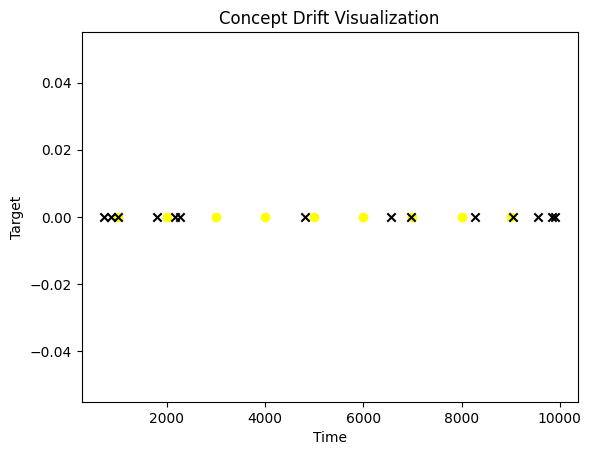

              precision    recall  f1-score     support
1              0.486667  0.637091  0.551811   1375.0000
2              0.531065  0.245554  0.335828   1462.0000
3              0.442636  0.452456  0.447492   1262.0000
4              0.728767  0.820988  0.772134   1620.0000
5              0.710696  0.696778  0.703668   1583.0000
6              0.590141  0.621201  0.605273   1349.0000
7              0.819763  0.873239  0.845657   1349.0000
accuracy       0.625500  0.625500  0.625500      0.6255
macro avg      0.615676  0.621044  0.608837  10000.0000
weighted avg   0.621179  0.625500  0.613652  10000.0000


In [29]:
from skmultiflow.drift_detection import DDM, ADWIN
from skmultiflow.drift_detection.eddm import EDDM
from sklearn.naive_bayes import GaussianNB
from skmultiflow.meta import AccuracyWeightedEnsembleClassifier
from sklearn.metrics import classification_report

covertype_stream = DataStream(data=covertype_df.drop('Cover_Type', axis=1).to_numpy(), y=covertype_df['Cover_Type'].to_numpy())
sea_stream.reset()

drift_detector = DDM(warning_level=2.8, min_num_instances=50) 
clf = GaussianNB()
clf2 = AccuracyWeightedEnsembleClassifier(n_estimators = 10, base_estimator = GaussianNB(), n_splits=None)

N_SAMPLES = 10000
curr_samples = 0
actual_drift_points = [1000 * n for n in range(1, 10)]
guessed_predictions = []
drift_points = []
features = [[] for _ in range(54)]
targets = []
last_X_window = []
last_y_window = []

X, y = covtype_stream.next_sample(1)
clf.partial_fit(X, y, classes=[i+1 for i in range(7)])
in_warning_zone = False

sea_stream.generate_drift()

while curr_samples < N_SAMPLES and covertype_stream.has_more_samples():
    #if curr_samples in actual_drift_points:
    #    sea_stream.generate_drift()

    X, y = covertype_stream.next_sample()

    prediction = clf.predict(X)

    guessed_predictions.append(prediction[0])

    for i in range(54):
        features[i].append(X[0][i])
    targets.append(y[0])
    drift_detector.add_element(1 - int(y[0] == prediction[0]))
    if not in_warning_zone and drift_detector.detected_warning_zone():
        print('Warning zone has been detected in data: ' + str(curr_samples) + ' - of index: ' + str(curr_samples))
        in_warning_zone = True
    elif in_warning_zone and not drift_detector.detected_warning_zone():
        print('Warning zone has ended in data: ' + str(curr_samples) + ' - of index: ' + str(curr_samples))
        in_warning_zone = False
    if drift_detector.detected_change():
        print('Change has been detected in data: ' + str(curr_samples) + ' - of index: ' + str(curr_samples))
        # clf = GaussianNB()
        # clf.partial_fit(np.array(last_X_window).reshape(-1, 54), np.array(last_y_window).reshape(len(last_y_window)), classes=[i+1 for i in range(7)])
        
        drift_points.append(curr_samples)


    last_X_window.append(X)
    last_y_window.append(y)

    clf.partial_fit(X, y)

    if len(last_X_window) > 500:
        last_X_window.pop(0)
        last_y_window.pop(0)
    
    curr_samples += 1

kwargs = {'Feature ' + str(i): features[i] for i in range(54)}
df = pd.DataFrame(kwargs)
df.head()

plt.scatter(actual_drift_points, [0 for i in actual_drift_points], color='yellow', marker='o')
plt.scatter(drift_points, [0 for i in drift_points], color='black', marker='x')
plt.xlabel('Time')
plt.ylabel('Target')
plt.title('Concept Drift Visualization')
plt.show()

metrics = classification_report(targets, guessed_predictions, target_names=[str(i+1) for i in range(7)], output_dict=True)
print(pd.DataFrame(metrics).transpose())

In [ ]:

from streams import *
from skmultiflow.data import ConceptDriftStream
from skmultiflow.data import HyperplaneGenerator
from skmultiflow.data import LEDGeneratorDrift

stream = build_data_stream('covtype')


#### Create the ensemble

In [4]:
from ensemble import build_premade_ensemble, build_custom_ensemble
from sklearn.naive_bayes import GaussianNB

ensemble = build_premade_ensemble('batch', 10, GaussianNB())

#### Utilize drift detection methods

#### Evaluate

In [1]:
from skmultiflow.evaluation import EvaluatePrequential

evaluator = EvaluatePrequential(
    n_wait = 10,
    max_samples = 100,
    show_plot = False,
    metrics=['accuracy', 'running_time', 'accuracy', 'precision', 'gmean'],
    data_points_for_classification=False
)

evaluator.evaluate(stream=sea_stream, model=[ensemble], model_names=['ensemble'])

NameError: name 'sea_stream' is not defined